In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.examples import *
from data_reconstruct.utilities import *

In [3]:
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
# Read
mod1 = pd.read_excel('data/SAIPE.xls')
mod1.columns = mod1.iloc[0]
mod1 = mod1[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_tagged = process_saipe(mod1)
mod2_tagged = process_ppp(mod2)
mod1, mod1_cols, mod1_tags_cols = mod1_tagged
mod2, mod2_cols, mod2_tags_cols = mod2_tagged

# Merge
mod1, mod2, annotations = merge_data(mod1_tagged, mod2_tagged, agg_by_tag=False)

# Sample
num_samples = min(mod1.shape[0], 300)
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Predict Excluded Records

In [8]:
predicted_feature = 3

split_idx = int(.8 * len(mod2_sample))
pipeline_output = run_pipeline(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    train_idx=split_idx,
    column_fill=True,
    output_cols=[predicted_feature],
    # std_function_and_inv=(lambda x: x**3, lambda x: x**(1/3)),
    embedding_dim=50,
    embedding_kwargs={
        # 'project_mode': 'tsne',
        'epoch_pd': 2000,
        'log_pd': 200,
        'epoch_DNN': 100,
        'log_DNN': 20,
    },
    hidden_dim=50,
    nn_kwargs={
        'epochs': 200,
        'log_epoch': 20,
        # 'criterion': torch.nn.L1Loss(),
        # 'optimizer': lambda x: torch.optim.AdamW(x, lr=1e-6),
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (300, 19)
Dataset 1: (300, 9)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[200/2000] err:0.8807 alpha:1.6144
epoch:[400/2000] err:0.9163 alpha:1.7115
epoch:[600/2000] err:0.9237 alpha:1.7726
epoch:[800/2000] err:0.9192 alpha:1.8242
epoch:[1000/2000] err:0.9043 alpha:1.8724
epoch:[1200/2000] err:0.8631 alpha:1.9261
epoch:[1400/2000] err:0.7864 alpha:1.9933
epoch:[1600/2000] err:0.7317 alpha:2.0515
epoch:[1800/2000] err:0.7067 alpha:2.0912
epoch:[2000/2000] err:0.6941 alpha:2.1195
Finished Matching!
---------------------------------
Performing NLMA
epoch:[20/100]: loss:5.683044
epoch:[40/100]: loss:4.798720
epoch:[60/100]: loss:4.773710
epoch:[80/100]: loss:4.410092
epoch:[100/100]: loss:4.257913
Finished Mapping!
Setup: 0.025879500000201006
Get subset samples: 0.014211735333334067
Run model: 0.030579742999999934
Reconstruction loss: 0.0004917380000082025
Aligned loss: 0.00203599

# Evaluate Results

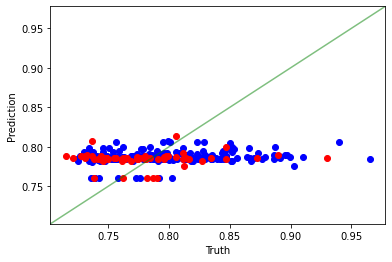

In [9]:
plot_example_results(mod2_sample.iloc[:, predicted_feature], pipeline_output, split_idx)